# Buisness Case: Walmart

### About Walmart

- Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.



## Business Problem

- The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
- They want to understand if the spending habits differ between male and female customers:
> Do women spend more on Black Friday than men?
(Assume 50 million customers are male and 50 million are female).

### Dataset

- The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
>
    - User_ID:	User ID
    - Product_ID:	Product ID
    - Gender:	Sex of User
    - Age:	Age in bins
    - Occupation:	Occupation(Masked)
    - City_Category:	Category of the City (A,B,C)
    - StayInCurrentCityYears:	Number of years stay in current city
    - Marital_Status:	Marital Status
    - ProductCategory:	Product Category (Masked)
    - Purchase:	Purchase Amount

In [4]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pylab

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)


In [1]:
!gdown 1QfrgRv_VMqqh7Y_munUgyRtuU-Xc57MG

Downloading...
From: https://drive.google.com/uc?id=1QfrgRv_VMqqh7Y_munUgyRtuU-Xc57MG
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 37.8MB/s]


In [5]:
# importing given sample dataset :
df = pd.read_csv("walmart_data.csv")


In [6]:
data = df.copy()

# Analysing Basic Metrics and Non-Graphical Analysis :

In [7]:
data.shape

(550068, 10)

In [9]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [12]:
(data.isna().sum()/len(data))*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

**Observations**
- From above information, no null values detected

In [14]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## Unique Values in each column :
- 5891 unique customers
- 3631 unique products  
- 7 different age groups
- 3 different city
- stay in current city from 0 to 5 years
- Gender  , Marital status
- 20 different product category

**Observations**
- Purchase is the only numerical data
- changing all other data types as string/category.

In [ ]:
data["Product_Category"] = data["Product_Category"].astype("str")
data["Marital_Status"] = data["Marital_Status"].astype("str")
data["Occupation"] = data["Occupation"].astype("str")
data["User_ID"] = data["User_ID"].astype("str")

In [ ]:
# describing data
data.describe(include="object")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [15]:
# replacing gender and marital status values.
data["Gender"].replace({"M":"Male",
                               "F":"Female"},inplace=True)
data["Marital_Status"].replace({"0":"Singe",
                               "1":"Married"},inplace=True)

In [16]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,0,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,0,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,0,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,0,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,0,8,7969


In [17]:
data.duplicated().sum()

0

**Observations**
- No duplicated values is given in dataset

## Univariate Analysis

In [ ]:
data["Gender"].value_counts(normalize=True)*100

Male      75.310507
Female    24.689493
Name: Gender, dtype: float64

**Observations**
- 75% male and 25% are female customers as per given sample data
- company has 50 million customers are male and 50 million are female overall.

In [ ]:
data["Age"].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

**Observations**
- Majority of the customers are between age 18-35

In [18]:
data["City_Category"].value_counts(normalize=True)*100

City_Category
B    42.026259
C    31.118880
A    26.854862
Name: proportion, dtype: float64

In [19]:
data["Marital_Status"].value_counts(normalize=True)*100

Marital_Status
0    59.034701
1    40.965299
Name: proportion, dtype: float64

**Observations**
- Majority of the customers are not married

### Plots for basic distribution across given data :

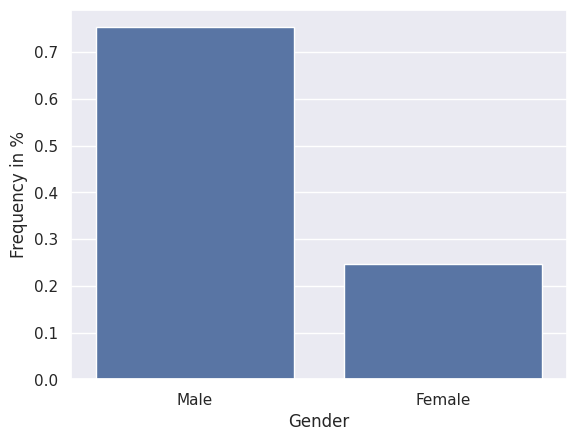

In [20]:
sns.barplot(x = data["Gender"].value_counts(normalize=True).index,
             y = data["Gender"].value_counts(normalize=True))
plt.xlabel("Gender")
plt.ylabel("Frequency in %")
plt.show()

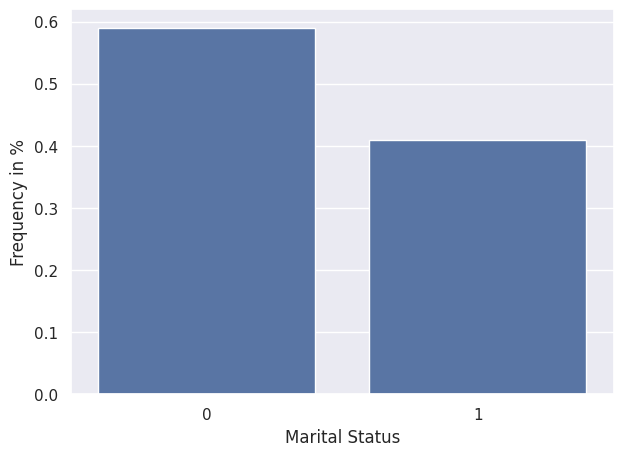

In [21]:
plt.figure(figsize=(7,5))
sns.barplot(x = data["Marital_Status"].value_counts(normalize=True).index,
             y = data["Marital_Status"].value_counts(normalize=True))
plt.xlabel("Marital Status")
plt.ylabel("Frequency in %")
plt.show()

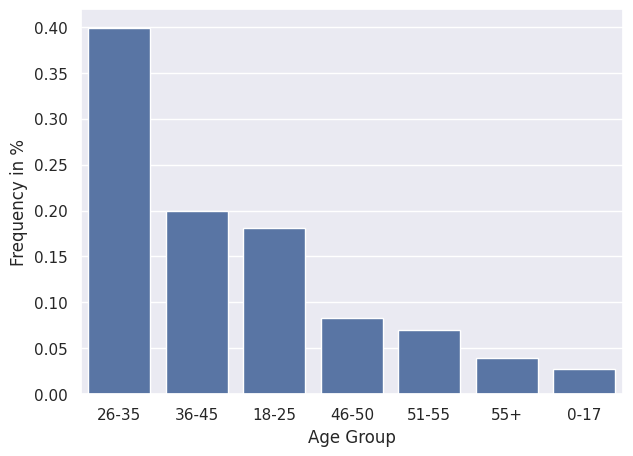

In [22]:
plt.figure(figsize=(7,5))
sns.barplot(x = data["Age"].value_counts(normalize=True).index,
             y = data["Age"].value_counts(normalize=True))
plt.xlabel("Age Group")
plt.ylabel("Frequency in %")
plt.show()

## Describing Purchase Statistic for Male and Female Data.

In [23]:
Male_data = data.loc[data["Gender"]=="Male"]
Male_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,414259.0,1.002996e+06,1706.493873,1000002.0,1001505.0,1003041.0,1004411.0,1006040.0
Occupation,414259.0,8.514750e+00,6.553790,0.0,3.0,7.0,15.0,20.0
Marital_Status,414259.0,4.063859e-01,0.491159,0.0,0.0,0.0,1.0,1.0
Product_Category,414259.0,5.301512e+00,4.006275,1.0,1.0,5.0,8.0,20.0
Purchase,414259.0,9.437526e+03,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [24]:
Female_data = data.loc[data["Gender"]=="Female"]
Female_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,135809.0,1.003130e+06,1786.630589,1000001.0,1001569.0,1003159.0,1004765.0,1006039.0
Occupation,135809.0,6.740540e+00,6.239639,0.0,1.0,4.0,11.0,20.0
Marital_Status,135809.0,4.196187e-01,0.493498,0.0,0.0,0.0,1.0,1.0
Product_Category,135809.0,5.717714e+00,3.696752,1.0,3.0,5.0,8.0,20.0
Purchase,135809.0,8.734566e+03,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0


## Describing Purchase Statistic for Married and Single Customer Data.

In [28]:
Singe_data = data.loc[data["Marital_Status"]==0]
Singe_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,324731.0,1.002999e+06,1700.465995,1000001.0,1001524.0,1003065.0,1004386.0,1006040.0
Occupation,324731.0,7.944782e+00,6.402753,0.0,3.0,7.0,14.0,20.0
Marital_Status,324731.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
Product_Category,324731.0,5.339059e+00,3.912070,1.0,1.0,5.0,8.0,20.0
Purchase,324731.0,9.265908e+03,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0


In [27]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,0,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,0,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,0,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,0,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,0,8,7969


In [29]:
Married_data = data.loc[data["Marital_Status"]==1]
Married_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,225337.0,1.003071e+06,1765.090842,1000004.0,1001506.0,1003093.0,1004647.0,1006039.0
Occupation,225337.0,8.266823e+00,6.687118,0.0,2.0,7.0,14.0,20.0
Marital_Status,225337.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
Product_Category,225337.0,5.498245e+00,3.968868,1.0,2.0,5.0,8.0,20.0
Purchase,225337.0,9.261175e+03,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


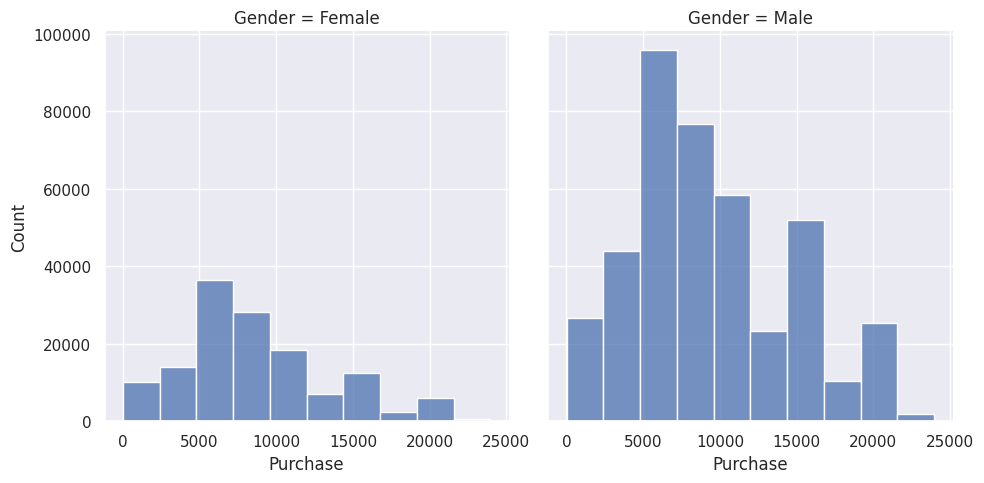

In [30]:
# Male and female Customes Spending Amount distriubtion
# checking if the purchase data is normally distributed
sns.displot(x = data["Purchase"], bins = 10, col=data["Gender"])
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase'>

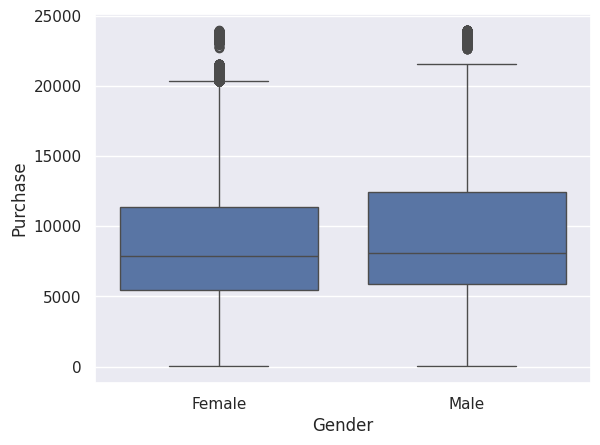

In [31]:
sns.boxplot(x = "Gender", y = "Purchase", data = data)

**Observations**
- outliers are there in data.

### **Outliers Calculations**

In [32]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data["Purchase"],25)
    Q3 = np.percentile(data["Purchase"],75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    length_after = len(data.loc[(data["Purchase"]>lowerbound)&(data["Purchase"]<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"


In [33]:
detect_outliers(data)

'0.0049 % Outliers data from input data found'

In [34]:
def detect_and_remove_outliers(data):
    Q1 = np.percentile(data["Purchase"],25)
    Q3 = np.percentile(data["Purchase"],75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    return data.loc[(data["Purchase"]>lowerbound)&(data["Purchase"]<upperbound)]


In [35]:
data = detect_and_remove_outliers(data)

# Balancing the gender despaires

In [ ]:
data["Gender"].value_counts()

Male      412171
Female    135220
Name: Gender, dtype: int64

In [ ]:
135220/412171

0.3280677194659498

In [ ]:
condition =  data["Gender"]=="Male"

In [ ]:
samplemale = data[condition].sample(n=135809)
samplefemale = data.loc[data["Gender"]=="Female"]

In [ ]:
unbiased_data = pd.concat([samplemale,samplefemale])

In [ ]:
unbiased_data["Marital_Status"].value_counts(normalize=True)*100

Singe      58.715857
Married    41.284143
Name: Marital_Status, dtype: float64

In [ ]:
unbiased_data["Gender"].value_counts(normalize=True)*100

Male      50.10866
Female    49.89134
Name: Gender, dtype: float64

>> > #### Purchase data in given dataset is not perfectly normal . So with the help of Central Limit Theorem we can plot a distribution.

### CLT on Purchase [ Gender Wise ]

In [ ]:
def Bootstrapping_CLT_CI(data, confidence=95 , sample_size = 30000,trials = 200):


    '''
    data : array
    confidence level : Required Confidence Level
    Sample Size  : length of Sample Size
    Trials : How many times we take sample sample from data.
    '''
    print("Data Distribution before Sampling/Bootstrap:")
    sns.distplot(data,bins = 15)
    plt.show()

    bootstrapped_mean= np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size,replace=True)
        bootstrapped_mean[i] = np.mean(btssample)
    print()
    print("Data Distribution After Sampling/Bootstraping:")
    sns.distplot(bootstrapped_mean,bins = 15)
    print()
    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    print("t:",talfa_by2)
    margin_of_error = talfa_by2*standard_error
    print("sample mean :",sample_mean)
    print("sample standard deviation :",sample_std)
    print("sample size: ",sample_size)
    print("standard error :",standard_error)
    print("Margin of Error :",margin_of_error)


    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)

    plt.axvline(x = lower_,c = "r")
    plt.axvline(x = upper_,c = "r")
    plt.show()



    print("Confidence Interval : ",CI)


In [ ]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt

def plot_confidence_interval(x, values,  color='#2187bb', horizontal_line_width=0.25,confidence=95):

    def CI(data,confidence, sample_size=10000,trials = 500):

        bootstrapped_mean= np.empty(trials)

        for i in range(trials):
            btssample = data.sample(n=sample_size,replace=True)
            bootstrapped_mean[i] = np.mean(btssample)
        sample_mean = np.mean(bootstrapped_mean)
        sample_std = np.std(data)
        standard_error = sample_std/np.sqrt(sample_size)
        talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
        margin_of_error = talfa_by2*standard_error

        return margin_of_error,sample_mean+margin_of_error,sample_mean-margin_of_error




    error,bottom,top = CI(values,confidence)

    left = x - horizontal_line_width / 2
    top = np.mean(values) - error
    right = x + horizontal_line_width / 2
    bottom = np.mean(values) + error
    print("Confidence Interval : ",(top,bottom))
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, np.mean(values), 'o', color='#f44336')
    print("Sample Mean :",np.mean(values)," and ","Margin of Error :", error)


## Confidence Interval For Male (Purchase)

Data Distribution before Sampling/Bootstrap:


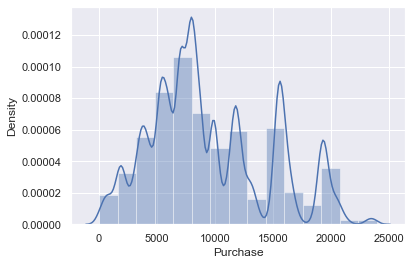


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9439.997732799999
sample standard deviation : 5092.180063635943
sample size:  10000
standard error : 50.92180063635943
Margin of Error : 99.8169779532666


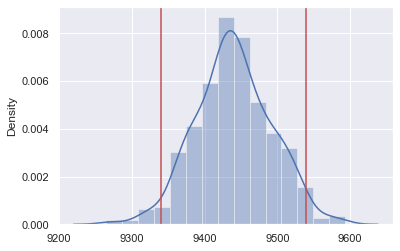

Confidence Interval :  (9340.180754846731, 9539.814710753266)


In [ ]:
Bootstrapping_CLT_CI(Male_data["Purchase"],sample_size=10000,trials=500)

## Confidence Interval For Female (Purchase)

Data Distribution before Sampling/Bootstrap:


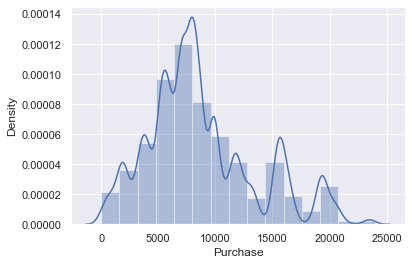


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 8737.9045464
sample standard deviation : 4767.215738016988
sample size:  10000
standard error : 47.672157380169885
Margin of Error : 93.44702313616523


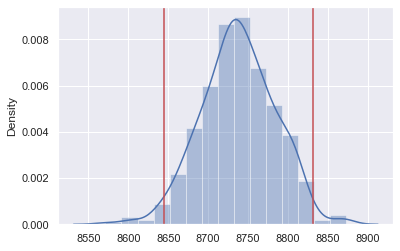

Confidence Interval :  (8644.457523263834, 8831.351569536164)


In [ ]:
Bootstrapping_CLT_CI(Female_data["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount with 95% confidence for spendings of Male and Female Customers :

Confidence Interval :  (9337.709062518998, 9537.343018425532)
Sample Mean : 9437.526040472265  and  Margin of Error : 99.8169779532666
Confidence Interval :  (8641.118742019311, 8828.01278829164)
Sample Mean : 8734.565765155476  and  Margin of Error : 93.44702313616523


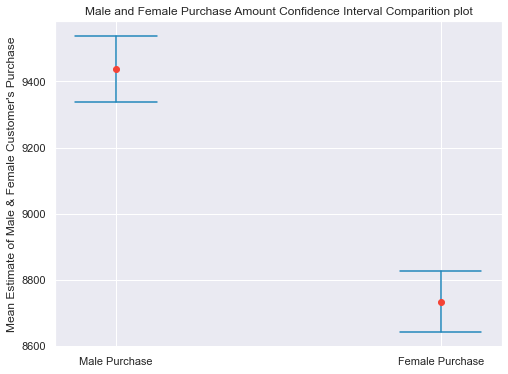

In [ ]:
plt.figure(figsize=(8,6))

plot_confidence_interval(x=1,values=Male_data["Purchase"])
plot_confidence_interval(x=2,values=Female_data["Purchase"])
plt.xticks([1,2],["Male Purchase","Female Purchase"])
plt.title("Male and Female Purchase Amount Confidence Interval Comparition plot")
plt.ylabel("Mean Estimate of Male & Female Customer's Purchase")
plt.show()

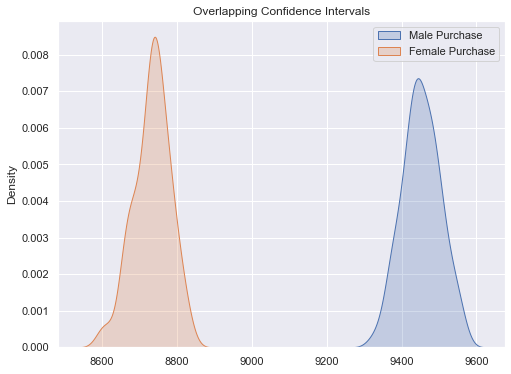

In [ ]:
male_expense_mean = [Male_data['Purchase'].sample(10000).mean() for i in range(100)]
female_expense_mean = [Female_data['Purchase'].sample(10000).mean() for i in range(100)]

plt.figure(figsize=(8,6))
sns.kdeplot(male_expense_mean,shade=True,label="Male Purchase")
sns.kdeplot(female_expense_mean,shade=True,label="Female Purchase")
plt.title(f"Overlapping Confidence Intervals")
plt.legend()
plt.show()


##### (with 95% confidence and sample size of 10000 , 500 trials. .)

> - As per confidence Interval comparison for both female purchase and male purchase data , its clear  that there's no over lapping , and hence there's a good amount of difference between Male and Female Spending amounts .
> - Male Customers are more likely to spend more amount than female customers .

- Average Male Spending Amount from all 100 million customers lies in Range of 9333 to 9533 as per Bootstrapping Method .

- Average Female Spending Amount from all 100 million customers lies in Range of 8639 to 8826 as per Bootstrapping Method .

In [ ]:
data = unbiased_data.copy()

In [ ]:
data["Age"].value_counts(normalize=True)*100

26-35    39.117954
36-45    19.977567
18-25    18.156360
46-50     8.738548
51-55     7.091492
55+       3.831693
0-17      3.086386
Name: Age, dtype: float64

## Confidence Interval For overall (Purchase) column

Data Distribution before Sampling/Bootstrap:


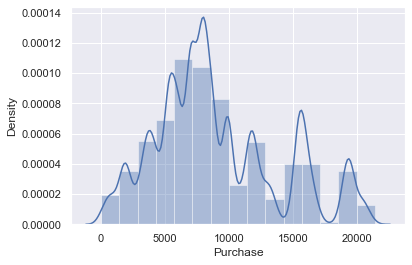


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9016.432756999999
sample standard deviation : 4855.711569632123
sample size:  10000
standard error : 48.55711569632123
Margin of Error : 95.18171954573734


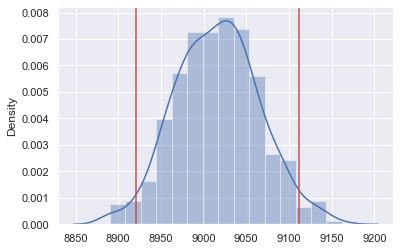

Confidence Interval :  (8921.251037454262, 9111.614476545736)


In [ ]:
Bootstrapping_CLT_CI(unbiased_data["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount with 95% confidence for all customers :

Confidence Interval :  (8922.589950644538, 9112.953389736012)
Sample Mean : 9017.771670190275  and  Margin of Error : 95.18171954573734


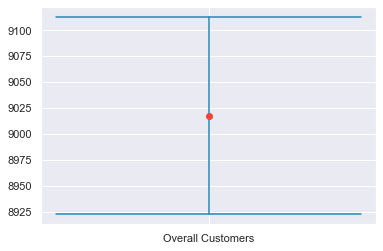

In [ ]:
plot_confidence_interval(x=1,values=data["Purchase"])
plt.xticks([1],["Overall Customers"])
plt.show()

> All 100 million customer's average spending amount lies between 8931 to 9122. and sample mean is 9026.

## Confidence Interval for Married People Purchase Data

Data Distribution before Sampling/Bootstrap:


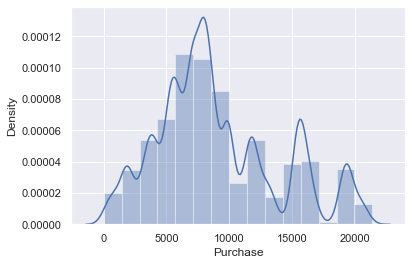


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9029.3994716
sample standard deviation : 4852.712076563867
sample size:  10000
standard error : 48.52712076563867
Margin of Error : 95.12292344471113


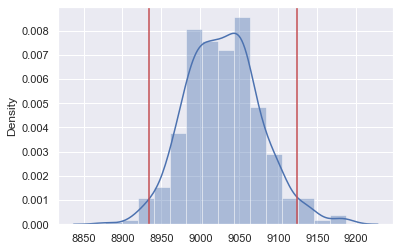

Confidence Interval :  (8934.276548155289, 9124.52239504471)


In [ ]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Married"]["Purchase"],sample_size=10000,trials=500)

## Confidence Interval for Single People Purchase Data

Data Distribution before Sampling/Bootstrap:


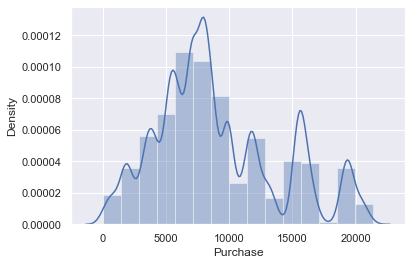


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9010.513542199998
sample standard deviation : 4857.801439755699
sample size:  10000
standard error : 48.57801439755699
Margin of Error : 95.22268520630772


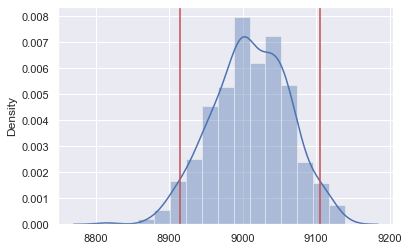

Confidence Interval :  (8915.29085699369, 9105.736227406307)


In [ ]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Singe"]["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount with 95% confidence for Married and Single Customers :

Confidence Interval :  (9162.83350649789, 9359.515641666858)
Sample Mean : 9261.174574082374  and  Margin of Error : 98.34106758448407
Confidence Interval :  (9167.361634404277, 9364.453603438737)
Sample Mean : 9265.907618921507  and  Margin of Error : 98.54598451723085


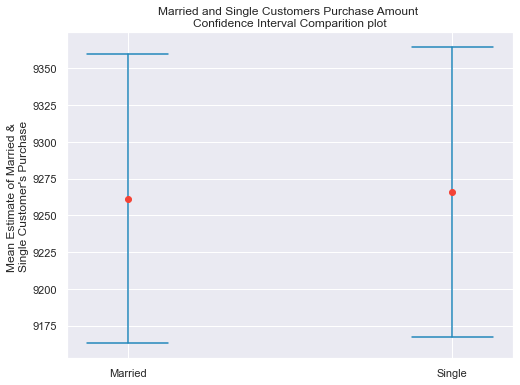

In [ ]:
plt.figure(figsize=(8,6))
plot_confidence_interval(x=1,values=Married_data["Purchase"])
plot_confidence_interval(x=2,values=Singe_data["Purchase"])
plt.xticks([1,2],["Married","Single"])
plt.title("Married and Single Customers Purchase Amount \nConfidence Interval Comparition plot")
plt.ylabel("Mean Estimate of Married & \nSingle Customer's Purchase")
plt.show()

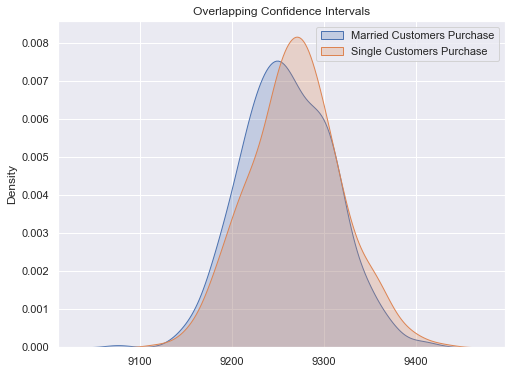

In [ ]:
Married_expenses_mean = [Married_data['Purchase'].sample(10000).mean() for i in range(500)]
Singe_expenses_mean = [Singe_data['Purchase'].sample(10000).mean() for i in range(500)]

plt.figure(figsize=(8,6))
sns.kdeplot(Married_expenses_mean,shade=True,label="Married Customers Purchase")
sns.kdeplot(Singe_expenses_mean,shade=True,label="Single Customers Purchase")
plt.title(f"Overlapping Confidence Intervals")
plt.legend()
plt.show()


- As per confidence Interval comparison for both Single and Married Customer's average purchase data
> There is not much difference between their average spending amounts. Married and Single Customer's spending amounts distribution are almost lies with same distribution.

## Function for findinf Confidence Interval with Different Sample Size

In [ ]:
def CI_with_different_sample_size(data,confidence=95 , sample_size=10000,trials = 500):

    bootstrapped_mean= np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size,replace=True)
        bootstrapped_mean[i] = np.mean(btssample)
    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    margin_of_error = talfa_by2*standard_error
    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)

    print()
    print("Confidence Level : ",confidence)
    print("Sample Size : ",sample_size)
    print("Margin of Error : ",margin_of_error)
    return f"Confidence Interval :,{CI}"


## Confidence Interval Calculations for Different Age Groups

In [ ]:
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    print("Age Group : ", age_group)
    print(CI_with_different_sample_size(data.loc[data["Age"]==age_group]["Purchase"]))
    print()
    print()

Age Group :  0-17

Confidence Level :  95
Sample Size :  10000
Margin of Error :  96.37122208233451
Confidence Interval :,(8532.905993717666, 8725.648437882335)


Age Group :  18-25

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.45472642526468
Confidence Interval :,(8751.608809374735, 8942.518262225265)


Age Group :  26-35

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.1062242303521
Confidence Interval :,(8931.139528569647, 9121.351977030352)


Age Group :  36-45

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.37426124240449
Confidence Interval :,(9037.773674557597, 9228.522197042406)


Age Group :  46-50

Confidence Level :  95
Sample Size :  10000
Margin of Error :  94.12717613242789
Confidence Interval :,(8906.72245426757, 9094.976806532426)


Age Group :  51-55

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.46153326010051
Confidence Interval :,(9144.0286349399, 9334.9517014601)


Age Group :  55+

Confi

##  Estimate of Average Spending Amount with 95% confidence for different age group Customers :

Age Group :  0-17
Confidence Interval :  (8529.636070206967, 8722.378514371636)
Sample Mean : 8626.007292289301  and  Margin of Error : 96.37122208233451
Age Group :  18-25
Confidence Interval :  (8750.22008915725, 8941.12954200778)
Sample Mean : 8845.674815582515  and  Margin of Error : 95.45472642526468
Age Group :  26-35
Confidence Interval :  (8932.71771630973, 9122.930164770434)
Sample Mean : 9027.823940540082  and  Margin of Error : 95.1062242303521
Age Group :  36-45
Confidence Interval :  (9037.619514729522, 9228.368037214332)
Sample Mean : 9132.993775971927  and  Margin of Error : 95.37426124240449
Age Group :  46-50
Confidence Interval :  (8907.418550940702, 9095.672903205557)
Sample Mean : 9001.54572707313  and  Margin of Error : 94.12717613242789
Age Group :  51-55
Confidence Interval :  (9144.723742494321, 9335.646809014523)
Sample Mean : 9240.185275754422  and  Margin of Error : 95.46153326010051
Age Group :  55+
Confidence Interval :  (8977.134435740085, 9164.4996518863)

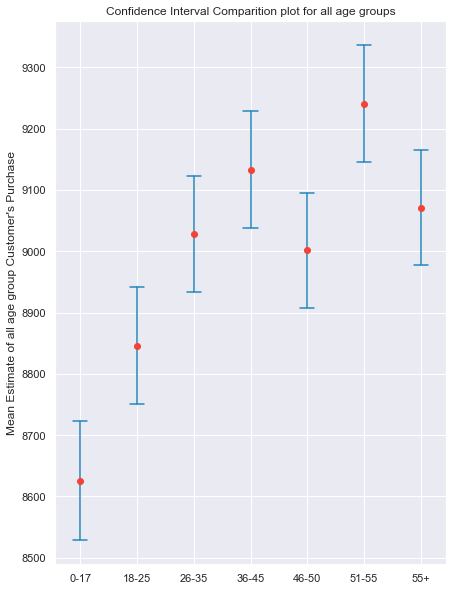

In [ ]:
plt.figure(figsize=(7,10))
i = 1
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    print("Age Group : ", age_group)
    (plot_confidence_interval(i,data.loc[data["Age"]==age_group]["Purchase"]))
    i = i+1

plt.xticks([1,2,3,4,5,6,7],['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+'])

plt.title("Confidence Interval Comparition plot for all age groups")
plt.ylabel("Mean Estimate of all age group Customer's Purchase")
plt.show()


plt.show()

Age Group :  0-17
Age Group :  18-25
Age Group :  26-35
Age Group :  36-45
Age Group :  46-50
Age Group :  51-55
Age Group :  55+


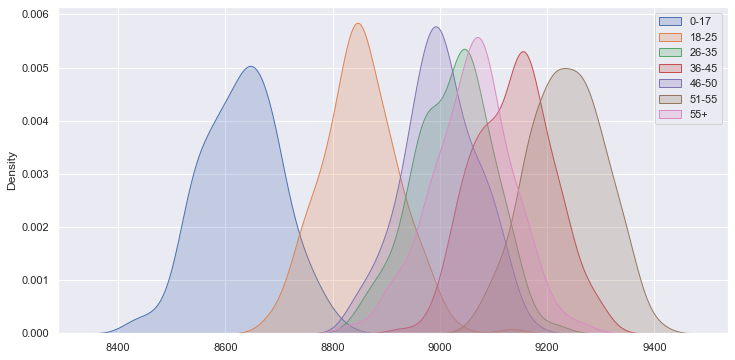

In [ ]:
plt.figure(figsize=(12,6))
i = 1
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:

    print("Age Group : ", age_group)
    x = [data.loc[data["Age"]==age_group]['Purchase'].sample(5000,replace=True).mean() for i in range(200)]
    sns.kdeplot(x,shade=True,label=age_group)

    i = i+1


plt.legend()

plt.show()

Customers from age 26-35 are 40% of all customers. and their Average Spending amount is near to overall customers average spending amount.

Age group 51-55 customers are more likely to spend more amount than all other groups. and customers under 17 age are the least spending average amount.

# Impact on Confidence Interval with Different Sample Size

In [ ]:
print(CI_with_different_sample_size(data["Purchase"],sample_size=50))
print(CI_with_different_sample_size(data["Purchase"],sample_size=250))
print(CI_with_different_sample_size(data["Purchase"],sample_size=750))
print(CI_with_different_sample_size(data["Purchase"],sample_size=1500))
print(CI_with_different_sample_size(data["Purchase"],sample_size=5000))
print(CI_with_different_sample_size(data["Purchase"],sample_size=25000))


Confidence Level :  95
Sample Size :  50
Margin of Error :  1379.977957470772
Confidence Interval :,(7663.552682529229, 10423.508597470773)

Confidence Level :  95
Sample Size :  250
Margin of Error :  604.8490349519348
Confidence Interval :,(8400.076637048065, 9609.774706951934)

Confidence Level :  95
Sample Size :  750
Margin of Error :  348.0748924261848
Confidence Interval :,(8672.878851573814, 9369.028636426183)

Confidence Level :  95
Sample Size :  1500
Margin of Error :  245.92696500299172
Confidence Interval :,(8772.034225663676, 9263.888155669658)

Confidence Level :  95
Sample Size :  5000
Margin of Error :  134.62357979617417
Confidence Interval :,(8879.557822603823, 9148.804982196172)

Confidence Level :  95
Sample Size :  25000
Margin of Error :  60.19383255702592
Confidence Interval :,(8955.702415122974, 9076.090080237027)


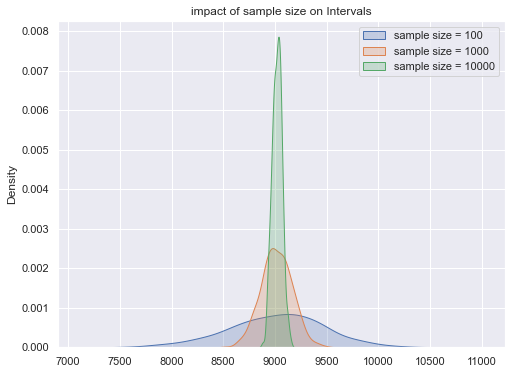

In [ ]:
one = [data['Purchase'].sample(100).mean() for i in range(500)]
two = [data['Purchase'].sample(1000).mean() for i in range(500)]
three = [data['Purchase'].sample(10000).mean() for i in range(500)]



plt.figure(figsize=(8,6))
sns.kdeplot(one,shade=True,label="sample size = 100")
sns.kdeplot(two,shade=True,label="sample size = 1000")
sns.kdeplot(three,shade=True,label="sample size = 10000")


plt.title(f"impact of sample size on Intervals")
plt.legend()
plt.show()


> ##### As per calculations and above distribution plot, as we increase the sample size, standard error decreases , means that the average spending amount gets closers and closer to the actual mean spending amount of the all customer average spending amount.



# Impact on Confidence Interval with different Confidence Levels

In [ ]:
print(CI_with_different_sample_size(data["Purchase"],confidence=90,sample_size=10000))
print(CI_with_different_sample_size(data["Purchase"],confidence=95,sample_size=10000))
print(CI_with_different_sample_size(data["Purchase"],confidence=99,sample_size=10000))



Confidence Level :  90
Sample Size :  10000
Margin of Error :  79.8767482806432
Confidence Interval :,(8938.796553519358, 9098.550050080645)

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.18171954573734
Confidence Interval :,(8921.992521054262, 9112.355960145736)

Confidence Level :  99
Sample Size :  10000
Margin of Error :  125.09872152238191
Confidence Interval :,(8895.903969277619, 9146.101412322381)


Confidence Interval :  (8947.866804331119, 9087.676536049432)
Sample Mean : 9017.771670190275  and  Margin of Error : 69.90486585915586
Confidence Interval :  (8937.894921909632, 9097.648418470919)
Sample Mean : 9017.771670190275  and  Margin of Error : 79.8767482806432
Confidence Interval :  (8922.589950644538, 9112.953389736012)
Sample Mean : 9017.771670190275  and  Margin of Error : 95.18171954573734
Confidence Interval :  (8892.672948667894, 9142.870391712657)
Sample Mean : 9017.771670190275  and  Margin of Error : 125.09872152238191


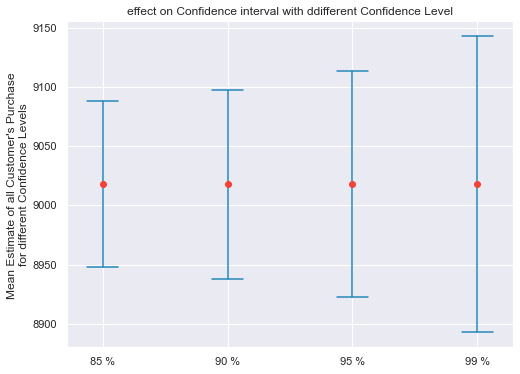

In [ ]:
plt.figure(figsize=(8,6))
plot_confidence_interval(x=0,values=data["Purchase"],confidence=85)
plot_confidence_interval(x=1,values=data["Purchase"],confidence=90)
plot_confidence_interval(x=2,values=data["Purchase"],confidence=95)
plot_confidence_interval(x=3,values=data["Purchase"],confidence=99)
plt.xticks([0,1,2,3],["85 %","90 %","95 %","99 %"])
plt.title("effect on Confidence interval with ddifferent Confidence Level")
plt.ylabel("Mean Estimate of all Customer's Purchase \nfor different Confidence Levels")
plt.show()

##### as we decide to increase the confidence level , the interval of confidence for given parameter gets wider.

# Product Category :

In [ ]:
# pd.crosstab(columns= data["Gender"],index=data["Product_Category"],margins=True,normalize="columns")*100

In [ ]:
# (pd.crosstab(columns= data["Gender"],index=data["Product_Category"],values=data["Purchase"],aggfunc=np.sum)/data["Purchase"].sum())*100

In [ ]:
pro_cat = (data.groupby("Product_Category")["Purchase"].sum()/data["Purchase"].sum()*100).sort_values(ascending=False)
pro_cat

Product_Category
1     34.875079
5     20.018549
8     18.429579
6      6.378530
2      5.388296
3      4.414174
16     2.956563
11     2.144176
15     1.564834
7      1.232078
10     0.912462
4      0.608987
14     0.503574
18     0.155356
12     0.131877
17     0.096989
13     0.084233
9      0.083478
20     0.020001
19     0.001183
Name: Purchase, dtype: float64

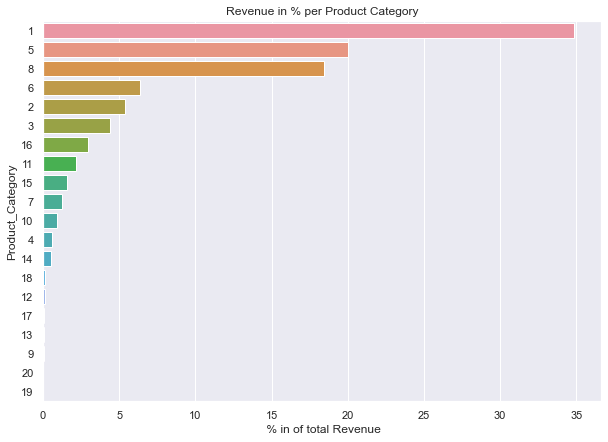

In [ ]:
plt.figure(figsize=(10,7))

sns.barplot(x = pro_cat,
           y = pro_cat.index
           )
plt.title("Revenue in % per Product Category")
plt.xlabel(" % in of total Revenue")
plt.show()

In [ ]:
(data["Product_Category"].value_counts(normalize=True)*100).sort_values(ascending=False)

5     28.798025
1     23.149552
8     22.161097
2      4.298433
11     4.121699
3      3.925410
6      3.649794
4      2.306026
16     1.810507
13     1.051548
15     0.977017
12     0.854521
7      0.675942
10     0.494043
20     0.485188
18     0.474119
14     0.337602
19     0.288161
17     0.087076
9      0.054238
Name: Product_Category, dtype: float64

# Most Common Product Categories which are sold together :

In [ ]:
groupedf = data.loc[data["User_ID"].duplicated(keep = False)]

In [ ]:
groupedf.shape

(271012, 10)

In [ ]:
groupedf["Group Order"] = groupedf.groupby("User_ID")["Product_Category"].transform(lambda  x : ",".join(x))
groupedf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Group Order
13774,1002051,P00004742,Male,36-45,7,C,2,Singe,6,20192,"6,5,1,1,1,1,5,6,6,1,6,1,1,6,6,5,1,1,5,1,1,1,6,..."
354150,1000560,P00154042,Male,46-50,15,C,1,Married,1,18987,"1,1,1,1,1,1,1,5,1,1,1,1,1,20,1,1,8,8,1,1,1,1,1..."
110519,1005026,P00352442,Male,26-35,17,B,1,Married,1,11967,"1,8,5,5,8,1,1,1,5,5,8,8,8,8,1,5,1,1,5,4,5,1,10..."
385916,1005397,P00086342,Male,18-25,0,B,2,Married,8,6111,"8,8,3,6,15,5,12,1,8,8,11,5,1,6,5,5,5,3,5,11,6,..."
302254,1004507,P00064042,Male,18-25,4,B,1,Married,3,13479,"3,11,8,5,11,5,1,1,5,5,2,5,3,6,1,1,15,2,1,1,1,5..."


In [ ]:
groupedf["Group Order"] = groupedf["Group Order"].apply(lambda x: ",".join(np.unique(x.split(","))))

In [ ]:
uniq_orders = groupedf[["User_ID","Group Order"]].drop_duplicates()

In [ ]:
uniq_orders.describe()

,User_ID,Group Order
count,5872,5872
unique,5872,2835
top,1002051,"1,5,8"
freq,1,123


In [ ]:
from collections import Counter
from itertools import combinations

In [ ]:
freq = Counter()
for r in groupedf["Group Order"]:

    row_list = r.split(",")
    freq.update(Counter(combinations(row_list,4)))
grouped_ordered_categories = freq.most_common(15)
grouped_ordered_categories

[(('1', '2', '5', '8'), 217471),
 (('1', '5', '6', '8'), 211573),
 (('1', '3', '5', '8'), 198821),
 (('1', '11', '5', '8'), 190851),
 (('1', '2', '5', '6'), 189101),
 (('1', '2', '6', '8'), 188376),
 (('2', '5', '6', '8'), 188322),
 (('1', '2', '3', '5'), 184308),
 (('1', '4', '5', '8'), 183249),
 (('2', '3', '5', '8'), 182173),
 (('1', '2', '3', '8'), 181778),
 (('1', '11', '2', '5'), 175369),
 (('1', '11', '2', '8'), 174108),
 (('11', '2', '5', '8'), 173908),
 (('1', '3', '5', '6'), 172663)]

In [ ]:
cat_sold_together = pd.DataFrame(data=[217471,211573,198821,190851,189101,188376,188322,184308,
183249,182173,181778,175369,174108,173908,172663],
    index = ["'1', '2', '5', '8'",  "'1', '5', '6', '8'  ","'1', '3', '5', '8'  ",
"'1', '11','5', '8'  ","'1', '2', '5', '6'  ","'1', '2', '6', '8'  ",
"'2', '5', '6', '8'  ","'1', '2', '3', '5'  ","'1', '4', '5', '8'  ",
"'2', '3', '5', '8'  ","'1', '2', '3', '8'  ","'1', '11','2', '5'  ",
"'1', '11','2', '8'  ","'11', '2','5', '8'  ","'1', '3', '5', '6'  "],columns=["Orders"]
)


In [ ]:
cat_sold_together["group_order_in_percentage"] = (cat_sold_together["Orders"]/len(data))*100

In [ ]:
group_order_in_percentage = cat_sold_together["group_order_in_percentage"]

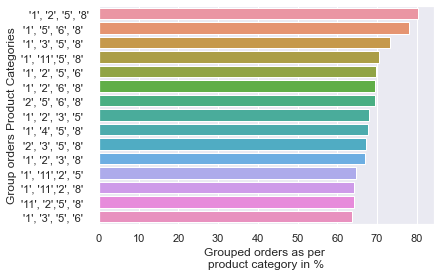

In [ ]:
sns.barplot(x = group_order_in_percentage,
           y = group_order_in_percentage.index)
plt.xlabel("Grouped orders as per \nproduct category in %")
plt.ylabel("Group orders Product Categories")
plt.show()

# City Category

In [ ]:
data["City_Category"].value_counts(normalize=True)*100

B    42.299533
C    31.076748
A    26.623719
Name: City_Category, dtype: float64

In [ ]:
City_cat = (data.groupby("City_Category")["Purchase"].sum()/data["Purchase"].sum()*100).sort_values(ascending=False)
City_cat

City_Category
B    41.635260
C    32.560317
A    25.804423
Name: Purchase, dtype: float64

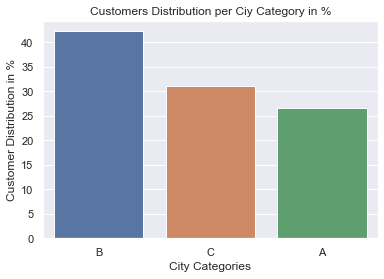

In [ ]:
sns.barplot(x = (data["City_Category"].value_counts(normalize=True)*100).index,
            y = (data["City_Category"].value_counts(normalize=True)*100) )

plt.title("Customers Distribution per Ciy Category in %")
plt.xlabel("City Categories")
plt.ylabel("Customer Distribution in %")
plt.show()

In [ ]:
pd.crosstab(columns=data["City_Category"],index=data["Age"],normalize="columns")*100

City_Category,A,B,C
Age,,,
0-17,2.491754,2.481595,4.419011
18-25,18.392971,19.168033,16.576632
26-35,49.632750,38.848959,30.475976
36-45,18.556501,20.103102,21.024137
46-50,4.567754,9.584453,11.160317
51-55,4.393137,7.559052,8.766785
55+,1.965132,2.254806,7.577143


- most of Customers from City category A are from 18-45 years age
- most of Customers from City category B are from 18-50 years age
- most of Customers from City category C are from 18-50 years age

# Customers their stay in current city (in years) :



In [ ]:
Stayed_in_city_years_cat = data["Stay_In_Current_City_Years"].value_counts(normalize=True)*100

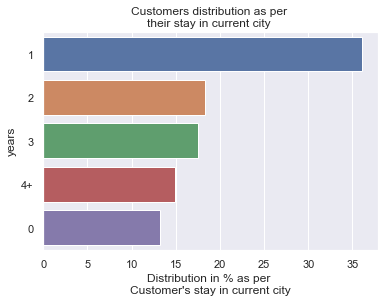

In [ ]:
sns.barplot(y = Stayed_in_city_years_cat.index,
             x  = Stayed_in_city_years_cat)
plt.title("Customers distribution as per \ntheir stay in current city ")
plt.ylabel("years")
plt.xlabel("Distribution in % as per \nCustomer's stay in current city")
plt.show()

In [ ]:
pd.crosstab(columns=data["City_Category"],index=data["Stay_In_Current_City_Years"],normalize="columns")*100

City_Category,A,B,C
Stay_In_Current_City_Years,,,
0,15.685025,12.509159,12.097071
1,33.644225,36.940442,37.028506
2,18.577289,17.256027,19.394019
3,18.083927,18.607167,15.614945
4+,14.009535,14.687206,15.865459


- all city categories are having customers majorly who are living there for 1 to 2 years.


## revenue generated per age (in % )


In [ ]:
ages_d = (data.groupby("Age")["Purchase"].sum()/data["Purchase"].sum())*100

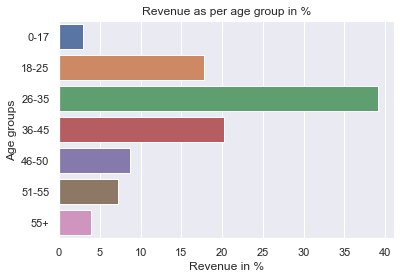

In [ ]:
sns.barplot(y = ages_d.index,
             x  = ages_d)
plt.title("Revenue as per age group in %")
plt.ylabel("Age groups")
plt.xlabel("Revenue in %")
plt.show()

## Purchase / Revenue per age / gender group

In [ ]:
(pd.crosstab(index= data["Age"],columns=data["Gender"],values=data["Purchase"],aggfunc=np.sum,margins=True)/data["Purchase"].sum())*100

Gender,Female,Male,All
Age,,,
0-17,1.714697,1.238561,2.953258
18-25,8.365575,9.376115,17.741691
26-35,17.946073,21.140769,39.086842
36-45,9.835011,10.454375,20.289386
46-50,4.716434,4.038426,8.754860
51-55,3.586172,3.708635,7.294806
55+,1.822093,2.057064,3.879157
All,47.986055,52.013945,100.000000


- out of all women, 35% of the revenue coming from agae group 18 to 45 and so is same for men as well .

# Observations :

- Majority of customers are between age 18-45 years .


- 75% male and 25% are female customers as per given sample data


- from the given data:
>75.31 % customers are male
24.68 % customers are female
from the prproblem statement :
  company has 50 million customers are male and 50 million are female overall.
Given Sample is a gender biased .





- (with 95% confidence and sample size of 10000 , 500 trials. .) As per confidence Interval comparison for both female purchase and male purchase data , its clear that there's no over lapping , and hence there's a good amount of difference between Male and Female Spending amounts .

- Male Customers are more likely to spend more amount than female customers .
- Average Male Spending Amount from all 100 million customers lies in Range of 9333 to 9533 as per Bootstrapping Method .

- Average Female Spending Amount from all 100 million customers lies in Range of 8639 to 8826 as per Bootstrapping Method .








- All 100 million customer's average spending amount lies between 8931 to 9122. and sample mean is 9026.





- As per confidence Interval comparison for both Single and Married Customer's average purchase data
- There is not much difference between their average spending amounts. Married and Single Customer's spending amounts distribution are almost lies with same distribution.



- Customers from age 26-35 are 40% of all customers. and their Average Spending amount is near to overall customers average spending amount.

- Age group 51-55 customers are more likely to spend more amount than all other groups. and customers under 17 age are the least spending average amount.





- we increase the sample size, standard error decreases , means that the average spending amount gets closers and closer to the actual mean spending amount of the all customer average spending amount.



> Top 3 Highest Revenue generating Product Categories :

- Category 1 is the highest revenue generating Product category ( 35 % )
- Category 5 is the highest revenue generating Product category ( 20 % )
- Category 8 is the highest revenue generating Product category ( 18 % )







- City Category B has highest Customers Base compared to C and A category.






# Recommendations :

- City Category B has the highest customer base compared to C and A . Since City Category A and C customers, have the lesser spending average amount that city category B customers, more infrastructure and marketing strategies can be focued on City category A.  
- There is not much significant difference between Married and Single Category Customers, no changes needs to be taken in that area.
- And there is a huge gap and difference between Male and Female spending average amounts and intervals, We can introduce special offers for particularly women like Women's day offer , or mother special or something like that.
- Age group 0-25 has the lowest spendings compared to other age groups. Since most of the 0-25 age customers would be students , more products related students / teenage / kids recommended to introduce and university/student discount can help increase the revenue from this age group.